Import libraries and use panda to load the csv data into a DataFrame object.  Trim the first column so that you have another variable that stores only image data.  The indexes in trainingData and noLabels still correspond to the same image

In [120]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy.misc as smp
import scipy.spatial.distance as dist
from sklearn.metrics.pairwise import euclidean_distances
import matplotlib.pyplot as plt
from collections import Counter
from sklearn import cross_validation
from sklearn.metrics import confusion_matrix

trainingData = pd.read_csv('train.csv')
testingData = pd.read_csv('test.csv')
noLabels = trainingData.loc[:, 'pixel0':'pixel783']
onlyLabels = trainingData.loc[:, 'label'].values
labels = trainingData['label']
testingData

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


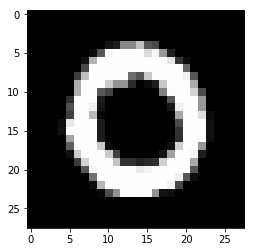

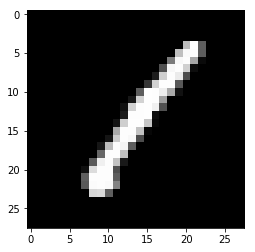

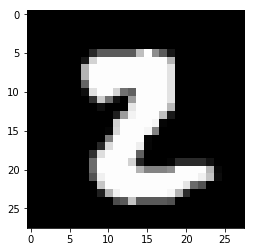

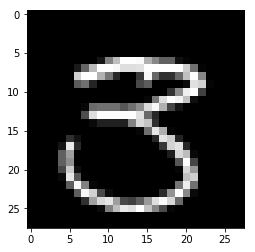

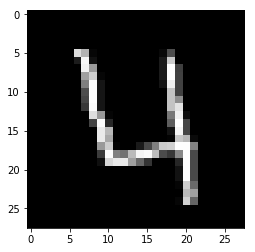

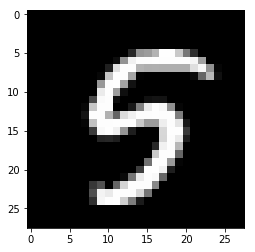

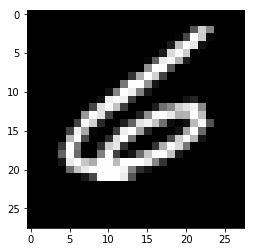

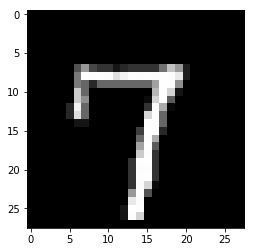

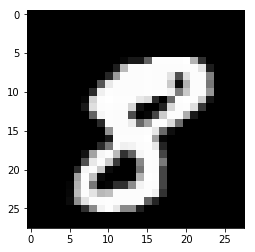

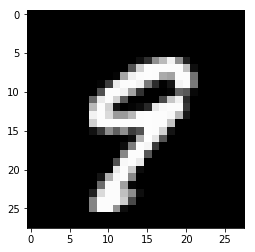

In [7]:
## 1b
def displayDigit(noLabelImageData, classification):
    imageData = noLabelImageData.values.reshape([28,28])
    plt.figure()
    plt.gray()
    plt.imshow(imageData)

for number in range(0,10):
    for index, data in enumerate(trainingData):
        if (trainingData.iloc[index].label == number):
            displayDigit(noLabels.iloc[index], number)
            break
            





(array([ 0.09838095,  0.11152381,  0.09945238,  0.10359524,  0.09695238,
         0.09035714,  0.0985    ,  0.10478571,  0.0967381 ,  0.09971429]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 10 Patch objects>)

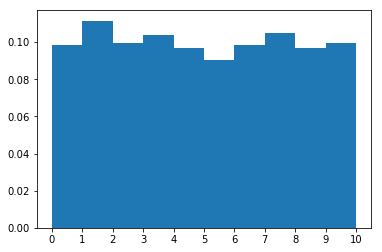

In [8]:
# (1c)

xs = [0,1,2,3,4,5,6,7,8,9,10]
#http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.xticks
plt.xticks(xs)
#https://matplotlib.org/devdocs/api/_as_gen/matplotlib.pyplot.hist.html
plt.hist(onlyLabels, normed=True, bins=xs) 



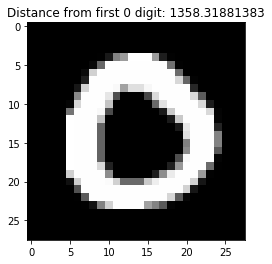

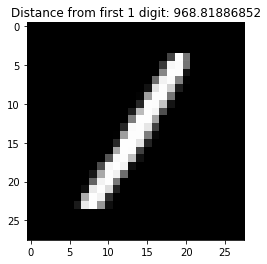

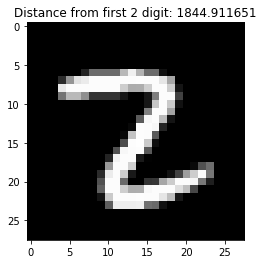

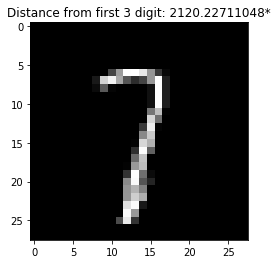

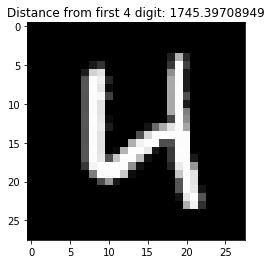

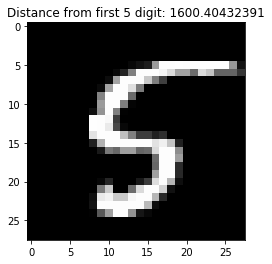

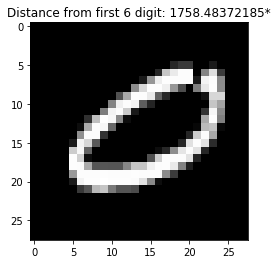

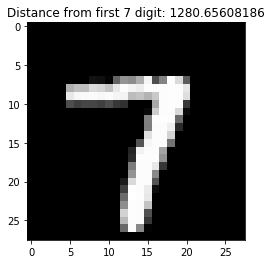

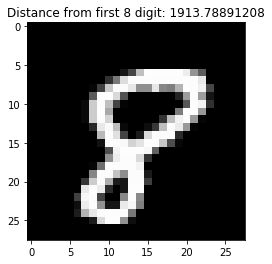

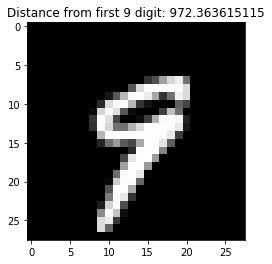

In [125]:
#(1d)

for number in range(0,10):
    minDistance = float("inf")
    # get the first row with the label of number
    firstRowOfNumber = trainingData[trainingData['label'] == number].iloc[0]
    indexOfSelectedRow = trainingData.index.get_loc(firstRowOfNumber.name) # get Index so we can skip it when we compare to training data
    for index, data in enumerate(trainingData):
        if (index  == indexOfSelectedRow):
            continue #skip the image being compared, bc this would yield distance of 0
        else:
            noLabelFirstRow = noLabels.iloc[indexOfSelectedRow]
            noLabelTrainingDataSample = noLabels.iloc[index]
            dst = dist.euclidean(noLabelFirstRow, noLabelTrainingDataSample) 
            # https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.euclidean.html#scipy.spatial.distance.euclidean
            if dst < minDistance:
                minDistance = dst
                bestMatch = noLabelTrainingDataSample
                if trainingData.iloc[index].label == trainingData.iloc[indexOfSelectedRow].label:
                    appendString = "" # will append nothing if labels match
                else:
                    appendString = "*" # will append asterisk if labels mismatch
    imageDataForNearestNeighbor = bestMatch.values.reshape([28,28])
    plt.figure()
    plt.gray()
    plt.title("Distance from first " + str(number) + " digit: " + str(minDistance) + appendString)
    plt.imshow(imageDataForNearestNeighbor)




I am choosing the first 0 image, and the first 1 image.  I am then comparing the first 0 image against all other images, as well first 1 image against all other images

In [10]:
#1(e)
genuineMatches = []
impostorMatches = []


onlyOnesAndZeroes = trainingData[(trainingData['label'] == 0) | (trainingData['label'] == 1)]

for FirstIndex, data in enumerate(onlyOnesAndZeroes):
    for SecondIndex, secondData in enumerate(onlyOnesAndZeroes):
        distance = dist.euclidean(onlyOnesAndZeroes.iloc[FirstIndex], onlyOnesAndZeroes.iloc[SecondIndex])

        if onlyOnesAndZeroes.iloc[FirstIndex].label == 0 and onlyOnesAndZeroes.iloc[SecondIndex].label == 0:
            genuineMatches.append(distance)   
        if onlyOnesAndZeroes.iloc[FirstIndex].label == 1 and onlyOnesAndZeroes.iloc[SecondIndex].label == 1:
            genuineMatches.append(distance)  
        if onlyOnesAndZeroes.iloc[FirstIndex].label == 1 and onlyOnesAndZeroes.iloc[SecondIndex].label == 0:
            impostorMatches.append(distance)
        if onlyOnesAndZeroes.iloc[FirstIndex].label == 0 and onlyOnesAndZeroes.iloc[SecondIndex].label == 1:
            impostorMatches.append(distance)

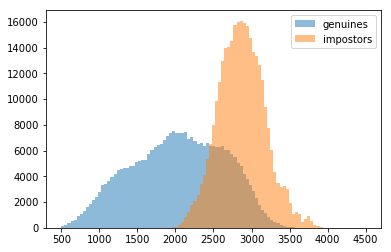

In [11]:
bins = np.linspace(500, 4500, 100)
plt.hist(genuineMatches, bins, alpha=0.5, label='genuines')
plt.hist(impostorMatches, bins, alpha=0.5, label='impostors')
plt.legend(loc='upper right')
plt.show()

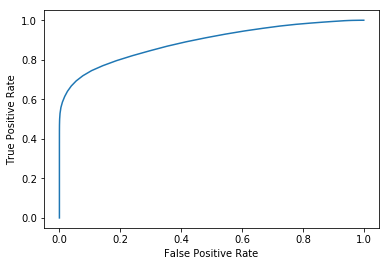

In [12]:
#1(f)
def truePosFalsePosRates(threshold):
    truePos=0
    flaseNeg=0
    falsePos=0
    trueNeg=0
    
    for i in genuineMatches:
        if i < threshold:
            truePos=truePos+1
        else:
            flaseNeg=flaseNeg+1

    for i in impostorMatches:
        if i < threshold:
            falsePos=falsePos+1
        else:
            trueNeg=trueNeg+1
            
    falsePosRate=(falsePos)/(falsePos+trueNeg)
    truePosRate=(truePos)/(truePos+flaseNeg)
    return truePosRate,falsePosRate

x=[]
y=[]
threshold = []
for i in range(0,3995,50):
    threshold.append(i)
    truePosRate,falsePosRate = truePosFalsePosRates(i)
    x.append(falsePosRate)
    y.append(truePosRate)
    
plt.plot(x,y)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

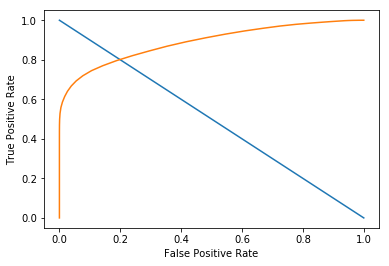

In [13]:
l = [0,1]
m = [1,0]
plt.plot(l,m)
plt.plot(x,y)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [34]:
err = 0.0 
for index, data in enumerate(y):
    if (1 - y[index]) < x[index] and y[index] > 0 and x[index] > 0:
        err_value = x[index]
        break

print (err_value)

0.24008455284552846


In [75]:
#1(g)

#https://docs.python.org/3/library/collections.html#collections.Counter

def match(k_neighbors):
    counter = Counter(k_neighbors)
    max_count = max(counter.values())
    match = [k for k,v in counter.items() if v == max_count]
    return match[0]
    
def all_k_neighbors(sortedValues, k, labels):
    result = []
    for i in sortedValues:
        label_list = [labels[x] for x in list(i[:k])]
        result.append(match(label_list))
    return result 

def KNN (testingData, trainingData, k, labels):
    distance = euclidean_distances(testingData, trainingData)
    sortedValues = np.argsort(distance)
    return all_k_neighbors(sortedValues, k, labels)


#https://docs.scipy.org/doc/numpy/reference/generated/numpy.argsort.html


In [81]:
#1(h)
three_folds = cross_validation.KFold(len(noLabels), n_folds=3)


aveAccuracy = 0
for i in three_folds:
    train, test = i
    
    X = noLabels.as_matrix()
    Y = trainingData.as_matrix()
    Y_train = labels.as_matrix()
    
    x_train = [X[x] for x in list(train)] #nolabels
    y_train = [Y_train[x] for x in list(train)] #labels
    
    x_test = [X[x] for x in list(test)]
    y_test = [Y_train[x] for x in list(test)]
    
    validation = KNN(x_test, x_train, 3, y_train)
    aveAccuracy = aveAccuracy + np.mean((np.asarray(validation)==y_test))
    print (confusion_matrix(y_test,validation))


[[1358    0    2    0    0    2    7    0    1    1]
 [   0 1561    1    2    2    1    4    1    1    2]
 [   7   17 1364    6    2    1    1   22    4    3]
 [   0    2    6 1369    0   12    1    7    9    4]
 [   0   16    0    0 1308    0    5    3    0   36]
 [   3    0    1   20    0 1227   11    2    3    9]
 [   6    1    0    0    3    8 1381    0    0    0]
 [   0   22    2    0    7    0    0 1414    0   19]
 [   5   11    5   20    1   30    8    4 1240   19]
 [   2    3    0    7   13    4    2   23    4 1309]]
[[1339    0    2    0    0    3    4    0    1    1]
 [   0 1517    5    0    1    1    1    6    1    0]
 [   8   18 1329    5    1    0    3   29    4    0]
 [   1    1    9 1438    0   18    1   11   10   10]
 [   2   14    0    0 1325    0    4    3    1   39]
 [   3    0    0   22    1 1189   16    1    2   11]
 [   8    2    0    0    1    9 1358    0    2    0]
 [   0   19    3    2    1    0    0 1417    0   18]
 [   2   10    5   21    8   26    6    2 125

In [123]:
#avg accuracy for our 3 folds
aveAccuracy/3

0.9664285714285713

In [82]:
testingData = testingData.iloc[:,:]
result = KNN (testingData, noLabels, 3, labels)
result

[2,
 0,
 9,
 9,
 3,
 7,
 0,
 3,
 0,
 3,
 5,
 7,
 4,
 0,
 4,
 3,
 3,
 1,
 9,
 0,
 9,
 1,
 1,
 5,
 7,
 4,
 2,
 7,
 4,
 7,
 7,
 5,
 4,
 2,
 6,
 2,
 5,
 5,
 1,
 6,
 7,
 7,
 4,
 9,
 8,
 7,
 8,
 2,
 6,
 7,
 6,
 8,
 8,
 3,
 8,
 2,
 1,
 2,
 2,
 0,
 4,
 1,
 7,
 0,
 0,
 0,
 1,
 9,
 0,
 1,
 6,
 5,
 8,
 8,
 2,
 8,
 8,
 9,
 2,
 3,
 5,
 4,
 1,
 0,
 9,
 2,
 4,
 3,
 6,
 7,
 2,
 0,
 6,
 6,
 1,
 4,
 3,
 9,
 7,
 4,
 0,
 9,
 2,
 0,
 7,
 3,
 0,
 5,
 0,
 8,
 0,
 0,
 4,
 7,
 1,
 7,
 1,
 1,
 3,
 3,
 3,
 7,
 2,
 8,
 6,
 3,
 8,
 7,
 8,
 4,
 3,
 5,
 6,
 0,
 0,
 0,
 3,
 1,
 3,
 6,
 4,
 3,
 4,
 5,
 5,
 8,
 7,
 7,
 2,
 8,
 4,
 3,
 5,
 6,
 5,
 3,
 7,
 5,
 7,
 8,
 3,
 0,
 4,
 5,
 1,
 2,
 7,
 6,
 3,
 0,
 2,
 7,
 8,
 6,
 1,
 3,
 7,
 4,
 1,
 2,
 4,
 8,
 5,
 2,
 4,
 9,
 2,
 1,
 6,
 0,
 6,
 1,
 4,
 9,
 6,
 0,
 9,
 7,
 6,
 9,
 1,
 9,
 0,
 9,
 9,
 0,
 8,
 4,
 6,
 2,
 0,
 9,
 3,
 6,
 7,
 2,
 1,
 6,
 3,
 4,
 2,
 3,
 1,
 0,
 2,
 0,
 9,
 6,
 1,
 0,
 0,
 4,
 9,
 1,
 7,
 3,
 2,
 2,
 8,
 6,
 8,
 6,
 2,
 8,
 5,
 5,
 9,
 8,
 3,
 5,


In [121]:
digitResult = pd.DataFrame({"Label":result})

#https://stackoverflow.com/questions/18176933/create-an-empty-data-frame-with-index-from-another-data-frame
#https://stackoverflow.com/questions/18022845/pandas-index-column-title-or-name

digitResult.insert(0, "ImageId", testingData.index+1)
digitResult.to_csv("submission.csv",index=False)